In [2]:
import pandas as pd
from math import sqrt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [3]:
dataset=pd.read_csv("order.csv")
dataset.shape

(13135, 12)

In [4]:
dataset

,CustomerCode,CountryName,QtyRequired,TotalArea,Amount,ITEM_NAME,QualityName,DesignName,ColorName,ShapeName,AreaFt,AreaMtr
0,H-1,USA,6,128.25,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,OLD LONDON [3715],GREEN/IVORY,REC,128.2500,11.5425
1,H-1,USA,6,117.00,702.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],BEIGE,REC,117.0000,10.5300
2,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,WEMBLY [CC-206],BEIGE/SAGE,REC,88.0000,7.9200
3,H-1,USA,7,88.00,616.0,HAND TUFTED,TUFTED 60C,SYMPHONY [8900],CHARCOAL,REC,88.0000,7.9200
4,H-1,USA,5,117.00,585.0,HAND TUFTED,TUFTED 60C,DUDLEY [9012],NAVY/BEIGE,REC,117.0000,10.5300
...,...,...,...,...,...,...,...,...,...,...,...,...
13130,P-5,USA,51,80.00,51.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC,80.0000,7.2000
13131,P-5,USA,41,40.00,41.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC,40.0000,3.6000
13132,P-5,USA,23,108.00,23.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC,108.0000,9.7200
13133,P-5,USA,22,140.00,22.0,DURRY,FLATWOVEN PET 60C 2PLY,10428,BLUE,REC,140.0000,12.6000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerCode  13135 non-null  object 
 1   CountryName   13135 non-null  object 
 2   QtyRequired   13135 non-null  int64  
 3   TotalArea     13135 non-null  float64
 4   Amount        13135 non-null  float64
 5   ITEM_NAME     13135 non-null  object 
 6   QualityName   13135 non-null  object 
 7   DesignName    13135 non-null  object 
 8   ColorName     13135 non-null  object 
 9   ShapeName     13135 non-null  object 
 10  AreaFt        13135 non-null  float64
 11  AreaMtr       13135 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.2+ MB


In [6]:
dataset.describe()

,QtyRequired,TotalArea,Amount,AreaFt,AreaMtr
count,13135.000000,13135.000000,13135.000000,13135.000000,13135.000000
mean,44.460601,44.731370,2392.040164,54.622369,4.951740
std,228.749535,50.099597,16832.091080,49.072767,4.455933
min,1.000000,0.040000,0.000000,0.444400,0.040000
25%,3.000000,5.800000,163.200000,15.000000,1.350000
50%,8.000000,24.000000,590.625000,40.000000,3.600000
75%,20.000000,80.000000,1540.000000,80.000000,7.200000
max,6400.000000,1024.000000,599719.680000,645.722200,60.000000


In [8]:
dataset.nunique()

CustomerCode      45
CountryName       14
QtyRequired      297
TotalArea        300
Amount          3363
ITEM_NAME         12
QualityName      184
DesignName       987
ColorName        464
ShapeName          5
AreaFt           288
AreaMtr          311
dtype: int64

In [4]:
import pandas as pd

# Assuming 'dataset' is your DataFrame with all the columns
# Replace 'dataset' with your actual DataFrame name

columns_to_remove = ['QtyRequired', 'TotalArea', 'DesignName', 'AreaMtr']

# Creating a new DataFrame without the specified columns
dataset_filtered = dataset.drop(columns=columns_to_remove)



In [5]:
dataset_filtered

,CustomerCode,CountryName,Amount,ITEM_NAME,QualityName,ColorName,ShapeName,AreaFt
0,H-1,USA,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,GREEN/IVORY,REC,128.2500
1,H-1,USA,702.0,HAND TUFTED,TUFTED 60C,BEIGE,REC,117.0000
2,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,BEIGE/SAGE,REC,88.0000
3,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,CHARCOAL,REC,88.0000
4,H-1,USA,585.0,HAND TUFTED,TUFTED 60C,NAVY/BEIGE,REC,117.0000
...,...,...,...,...,...,...,...,...
13130,P-5,USA,51.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,80.0000
13131,P-5,USA,41.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,40.0000
13132,P-5,USA,23.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,108.0000
13133,P-5,USA,22.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,140.0000


In [6]:
# Looking at type of  the data
dataset_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13135 entries, 0 to 13134
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerCode  13135 non-null  object 
 1   CountryName   13135 non-null  object 
 2   Amount        13135 non-null  float64
 3   ITEM_NAME     13135 non-null  object 
 4   QualityName   13135 non-null  object 
 5   ColorName     13135 non-null  object 
 6   ShapeName     13135 non-null  object 
 7   AreaFt        13135 non-null  float64
dtypes: float64(2), object(6)
memory usage: 821.1+ KB


In [7]:
#This provides the descriptive statistical details of the data
dataset_filtered.describe()

,Amount,AreaFt
count,13135.000000,13135.000000
mean,2392.040164,54.622369
std,16832.091080,49.072767
min,0.000000,0.444400
25%,163.200000,15.000000
50%,590.625000,40.000000
75%,1540.000000,80.000000
max,599719.680000,645.722200


In [8]:
dataset_filtered.nunique()

CustomerCode      45
CountryName       14
Amount          3363
ITEM_NAME         12
QualityName      184
ColorName        464
ShapeName          5
AreaFt           288
dtype: int64

In [145]:

import pandas as pd

# Assuming 'df' is your DataFrame with the 'color' column
# Replace 'df' with your actual DataFrame

# Count the occurrences of each color
color_counts = dataset_filtered['ColorName'].value_counts()

# Select the top 10 colors
top_colors = color_counts.head(10).index

# Filter the DataFrame based on the top colors
dataset_filtered_top_colors = dataset_filtered[dataset_filtered['ColorName'].isin(top_colors)]



# Replcae color with new category

In [117]:

def extract_first_word(text):
    words = str(text).split('/')
    if words:
        first_word = words[0]
        if not any(char.isdigit() for char in first_word):
            return first_word
    return 'outlier'

# Create a new column 'FirstWord' containing the extracted first word before '/'
dataset_filtered['FirstWord'] = dataset_filtered['ColorName'].apply(extract_first_word)

# Save the updated DataFrame to a new CSV file
dataset_filtered.to_csv('updated_dataset_with_first_word.csv', index=False)

In [ ]:

# Count occurrences of each color
color_counts = dataset_filtered['FirstWord'].value_counts()

# Create a dictionary to map colors with counts less than 50 to 'other'
colors_to_replace = color_counts[color_counts < 50].index.tolist()
# Create a new column 'FilteredColor' with colors having counts less than 50 replaced by 'other'
dataset_filtered['Filteredcolor'] = dataset_filtered['FirstWord'].apply(lambda x: 'other' if x in colors_to_replace else x)
# Save the updated DataFrame to a new CSV file
dataset_filtered.to_csv('updated_dataset_with_filtered_colors.csv', index=False)

# Replace Quality with new category

In [73]:
# Define the function to extract the first word of each phrase divided by space
def extract_first_word(text):
    words = str(text).split()
    if words:
        first_word = words[0]
        # Check if the first word contains any numeric characters
        if not any(char.isdigit() for char in first_word):
            return first_word
    return 'outlier'

# Create a new column 'FirstWordQuality' containing the extracted first word of each phrase divided by space
dataset_filtered['FirstWordQuality'] = dataset_filtered['QualityName'].apply(extract_first_word)


# Create 'FilteredQuality' as a copy of 'FirstWordQuality' column
dataset_filtered['FilteredQuality'] = dataset_filtered['FirstWordQuality'].copy()

# Save the updated DataFrame to a new CSV file
dataset_filtered.to_csv('updated_dataset_with_first_word.csv', index=False)

In [74]:
dataset_filtered

,CustomerCode,CountryName,Amount,ITEM_NAME,QualityName,ColorName,ShapeName,AreaFt,FirstWord,FilteredColor,FirstWordQuality,Filteredcolor,FilteredQuality
0,H-1,USA,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,GREEN/IVORY,REC,128.2500,GREEN,<bound method NDFrame.copy of 0 TUFT...,TUFTED,GREEN,TUFTED
1,H-1,USA,702.0,HAND TUFTED,TUFTED 60C,BEIGE,REC,117.0000,BEIGE,<bound method NDFrame.copy of 0 TUFT...,TUFTED,BEIGE,TUFTED
2,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,BEIGE/SAGE,REC,88.0000,BEIGE,<bound method NDFrame.copy of 0 TUFT...,TUFTED,BEIGE,TUFTED
3,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,CHARCOAL,REC,88.0000,CHARCOAL,<bound method NDFrame.copy of 0 TUFT...,TUFTED,CHARCOAL,TUFTED
4,H-1,USA,585.0,HAND TUFTED,TUFTED 60C,NAVY/BEIGE,REC,117.0000,NAVY,<bound method NDFrame.copy of 0 TUFT...,TUFTED,NAVY,TUFTED
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130,P-5,USA,51.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,80.0000,BLUE,<bound method NDFrame.copy of 0 TUFT...,FLATWOVEN,BLUE,FLATWOVEN
13131,P-5,USA,41.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,40.0000,BLUE,<bound method NDFrame.copy of 0 TUFT...,FLATWOVEN,BLUE,FLATWOVEN
13132,P-5,USA,23.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,108.0000,BLUE,<bound method NDFrame.copy of 0 TUFT...,FLATWOVEN,BLUE,FLATWOVEN
13133,P-5,USA,22.0,DURRY,FLATWOVEN PET 60C 2PLY,BLUE,REC,140.0000,BLUE,<bound method NDFrame.copy of 0 TUFT...,FLATWOVEN,BLUE,FLATWOVEN


In [76]:
category_counts = dataset_filtered['FilteredQuality'].value_counts()

# Display the count of each category
print(category_counts)

TUFTED           4670
FLATWOVEN        2792
D.B.             1920
SHAGGY           1457
KNOTTED          1358
JACQUARD          393
HANDLOOM          254
HANDWOVEN         168
GUN                54
FLATWEAVE          45
TBL                12
INDO-TIBBETAN       8
Name: FilteredQuality, dtype: int64


# visualization

Most important of each feature

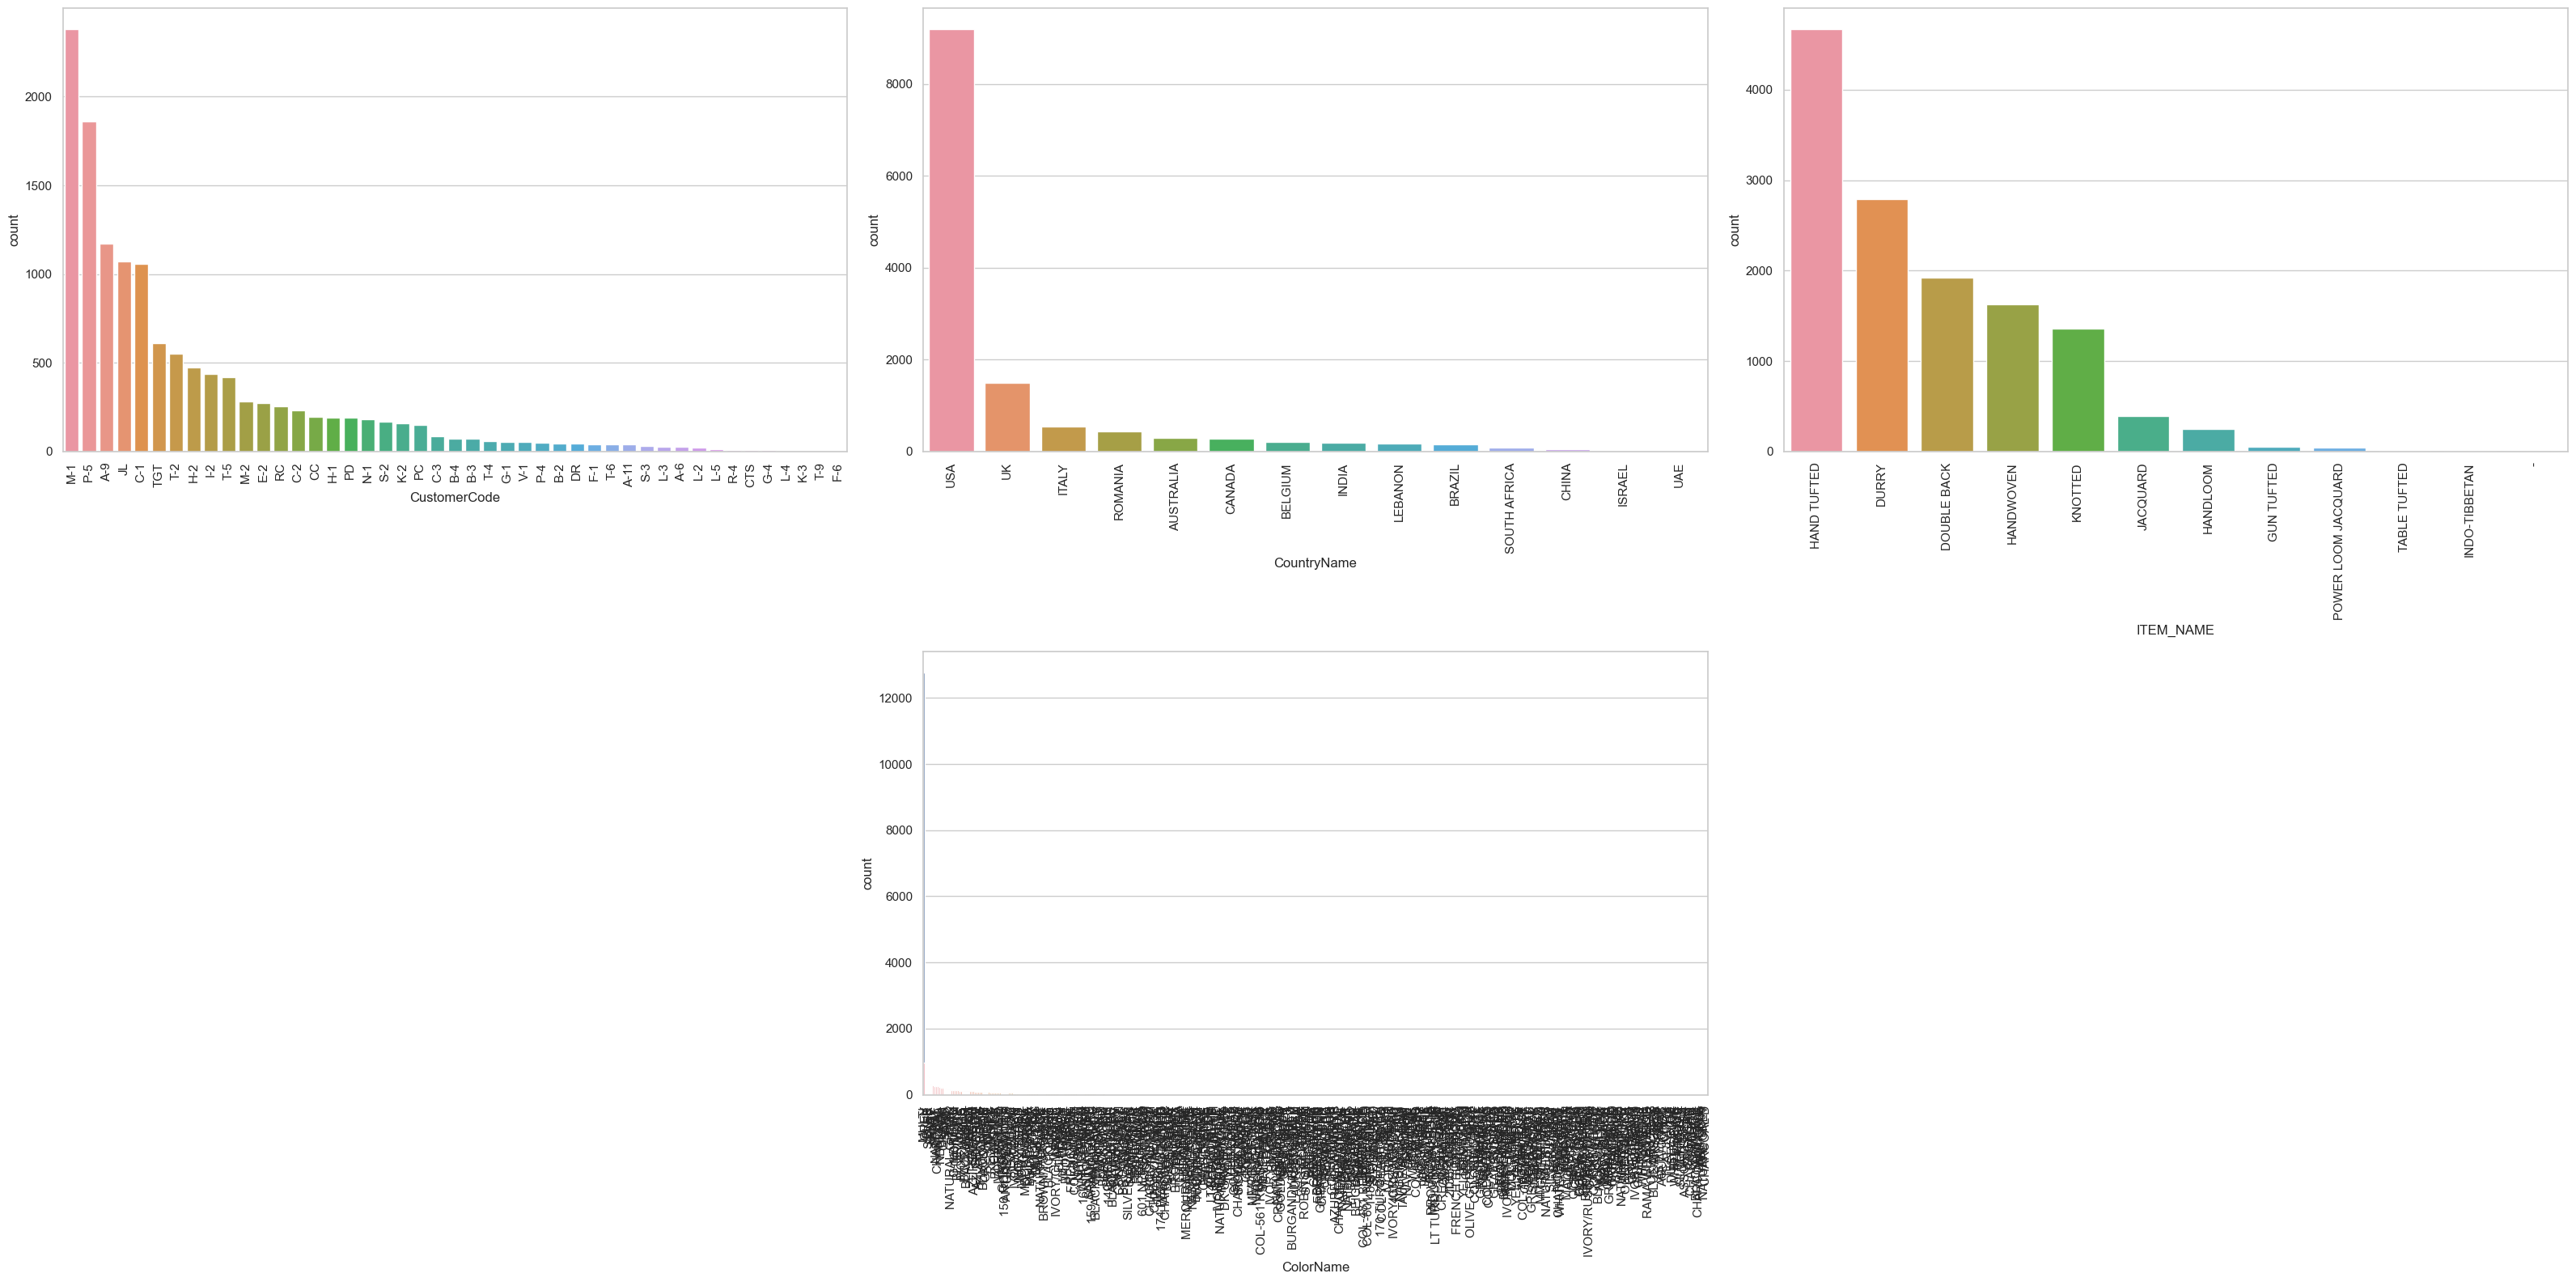

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'dataset_filtered' is your DataFrame with the required columns
# Replace 'dataset_filtered' with your actual DataFrame name

# Set a larger plot size
plt.figure(figsize=(32, 16))

# Plotting count plots for categorical variables with sorted categories and rotated x-axis labels
sns.set(style='whitegrid')

# Plotting CustomerCode count plot with sorted and rotated labels
plt.subplot(2, 3, 1)
sns.countplot(data=dataset_filtered, x='CustomerCode', order=dataset_filtered['CustomerCode'].value_counts().index)
plt.xticks(rotation=90)

# Plotting CountryName count plot with sorted and rotated labels
plt.subplot(2, 3, 2)
sns.countplot(data=dataset_filtered, x='CountryName', order=dataset_filtered['CountryName'].value_counts().index)
plt.xticks(rotation=90)

# Plotting ITEM_NAME count plot with sorted and rotated labels
plt.subplot(2, 3, 3)
sns.countplot(data=dataset_filtered, x='ITEM_NAME', order=dataset_filtered['ITEM_NAME'].value_counts().index)
plt.xticks(rotation=90)

# Plotting ColorName count plot with sorted and rotated labels
#plt.subplot(2, 3, 4)
#sns.countplot(data=dataset_filtered, x='ColorName', order=dataset_filtered['ColorName'].value_counts().index)
#plt.xticks(rotation=90)

# Plotting ShapeName count plot with sorted and rotated labels
plt.subplot(2, 3, 5)
sns.countplot(data=dataset_filtered, x='ShapeName', order=dataset_filtered['ShapeName'].value_counts().index)
plt.xticks(rotation=90)


# Plotting Scolorname count plot with sorted and rotated labels
plt.subplot(2, 3, 5)
sns.countplot(data=dataset_filtered, x='ColorName', order=dataset_filtered['ColorName'].value_counts().index)
plt.xticks(rotation=90)




plt.tight_layout()
plt.show()


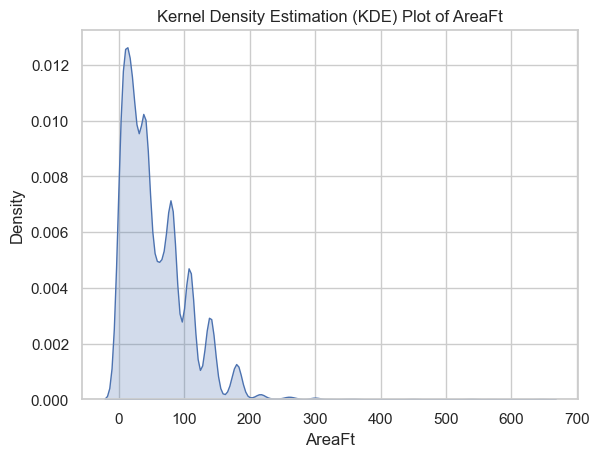

In [15]:
import seaborn as sns

# Plotting a KDE plot for a numeric feature (e.g., 'AreaFt')
sns.kdeplot(dataset_filtered['AreaFt'], fill=True)
plt.xlabel('AreaFt')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot of AreaFt')
plt.show()


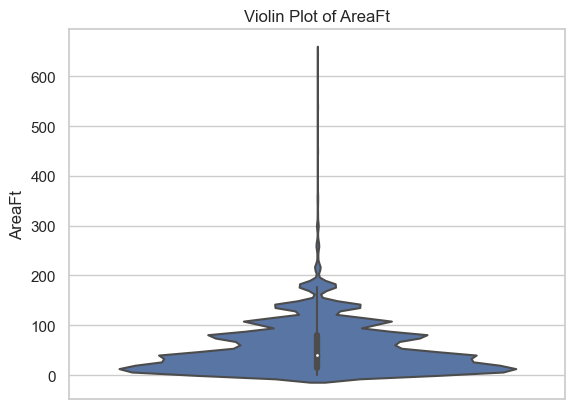

In [16]:

#Violin plots combine the information from box plots and KDE plots, 
#displaying both the summary statistics and the probability density of the data.
sns.violinplot(y=dataset_filtered['AreaFt'])
plt.ylabel('AreaFt')
plt.title('Violin Plot of AreaFt')
plt.show()


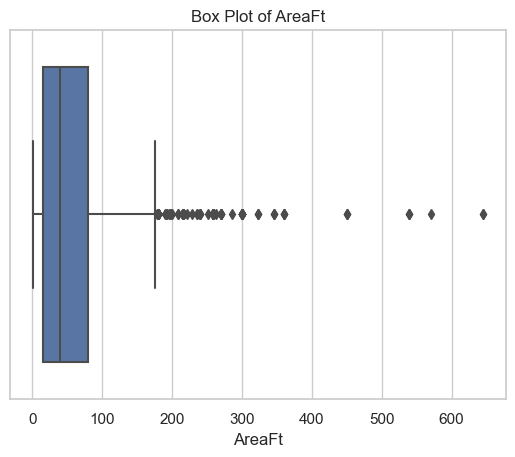

In [17]:
# Box plot
sns.boxplot(x=dataset_filtered['AreaFt'])
plt.xlabel('AreaFt')
plt.title('Box Plot of AreaFt')
plt.show()

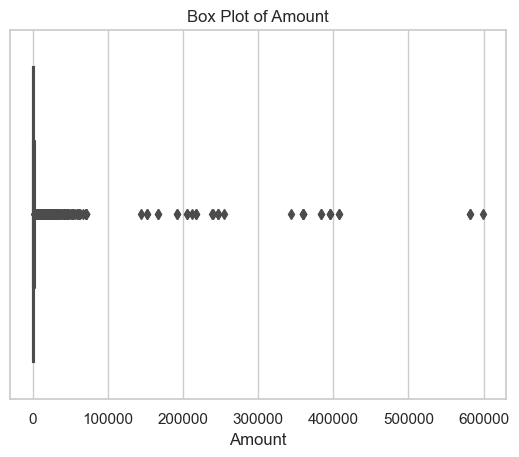

In [18]:
# Box plot for a numeric feature (e.g., 'Amount')
sns.boxplot(x=dataset_filtered['Amount'])
plt.xlabel('Amount')
plt.title('Box Plot of Amount')
plt.show()


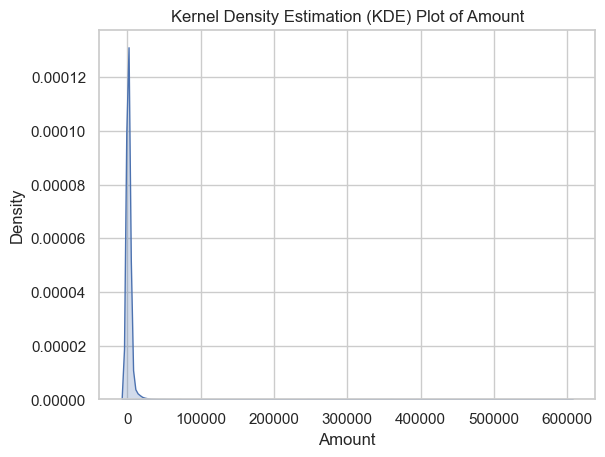

In [19]:
import seaborn as sns

# Plotting a KDE plot for a numeric feature (KDE plots provide a smoothed representation of the data's probability density function.)
sns.kdeplot(dataset_filtered['Amount'], fill=True)
plt.xlabel('Amount')
plt.ylabel('Density')
plt.title('Kernel Density Estimation (KDE) Plot of Amount')
plt.show()


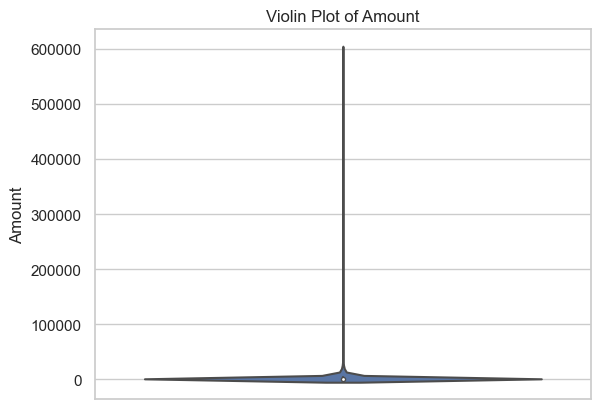

In [20]:
# Violin plot for a numeric feature 
#Violin plots combine the information from box plots and KDE plots, displaying both the summary statistics and the probability density of the data.
sns.violinplot(y=dataset_filtered['Amount'])
plt.ylabel('Amount')
plt.title('Violin Plot of Amount')
plt.show()

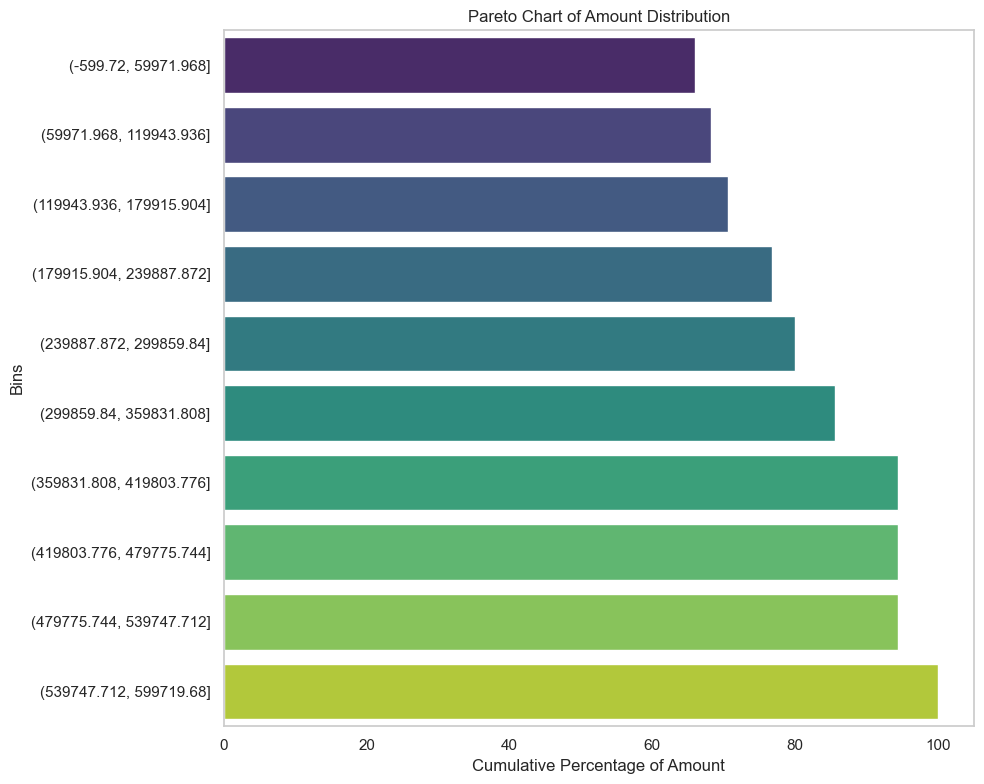

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'Amount' is the column name for your numeric data
# You can create bins using pd.cut or pd.qcut based on your requirement
bins = pd.cut(dataset_filtered['Amount'], bins=10)  # Adjust the number of bins as needed

# Calculate the cumulative percentage
cumulative_percentage = dataset_filtered.groupby(bins)['Amount'].sum().cumsum() / dataset_filtered['Amount'].sum() * 100

# Create a Pareto chart (Horizontal) with a different color palette
plt.figure(figsize=(10, 8))
sns.barplot(y=cumulative_percentage.index.astype(str), x=cumulative_percentage.values, palette='viridis')
plt.xlabel('Cumulative Percentage of Amount')
plt.ylabel('Bins')
plt.title('Pareto Chart of Amount Distribution')
plt.grid(axis='x')
plt.tight_layout()
plt.show()



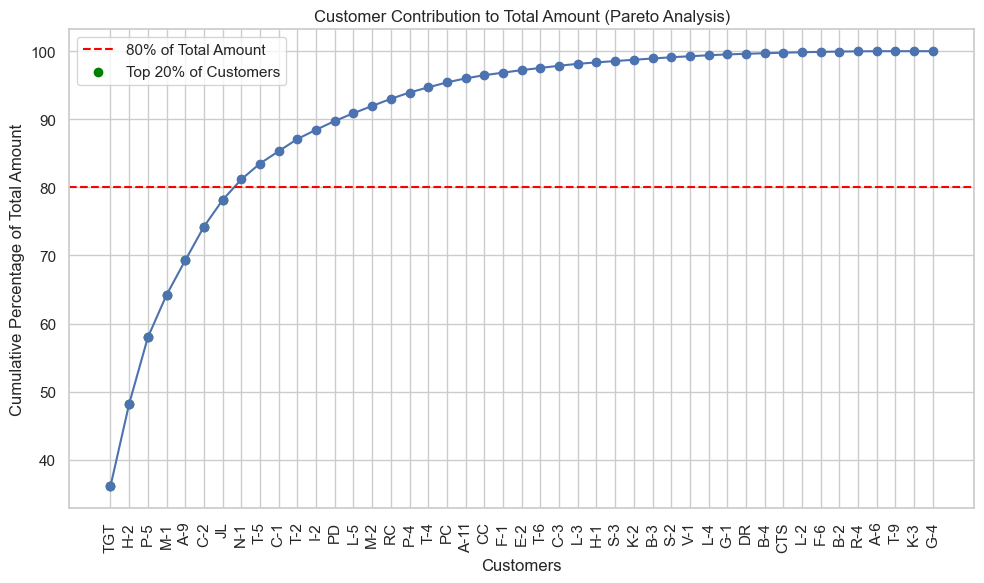

In [22]:
import pandas as pd
import matplotlib.pyplot as plt


customer_contribution = dataset_filtered.groupby('CustomerCode')['Amount'].sum().sort_values(ascending=False)
total_amount = customer_contribution.sum()
customer_contribution_cumulative = customer_contribution.cumsum() / total_amount * 100
top_20_customers = customer_contribution_cumulative[customer_contribution_cumulative <= 80]
plt.figure(figsize=(10, 6))
plt.plot(customer_contribution_cumulative, marker='o', linestyle='-')
plt.axhline(y=80, color='red', linestyle='--', label='80% of Total Amount')
plt.scatter(top_20_customers.index, top_20_customers.values, color='green', label='Top 20% of Customers')
plt.xlabel('Customers')
plt.ylabel('Cumulative Percentage of Total Amount')
plt.title('Customer Contribution to Total Amount (Pareto Analysis)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()



In [1]:
import pandas as pd

# Assuming 'CustomerCode' is the column name for your target variable
class_distribution = dataset_filtered['CustomerCode'].value_counts()
print(class_distribution)


NameError: name 'dataset_filtered' is not defined

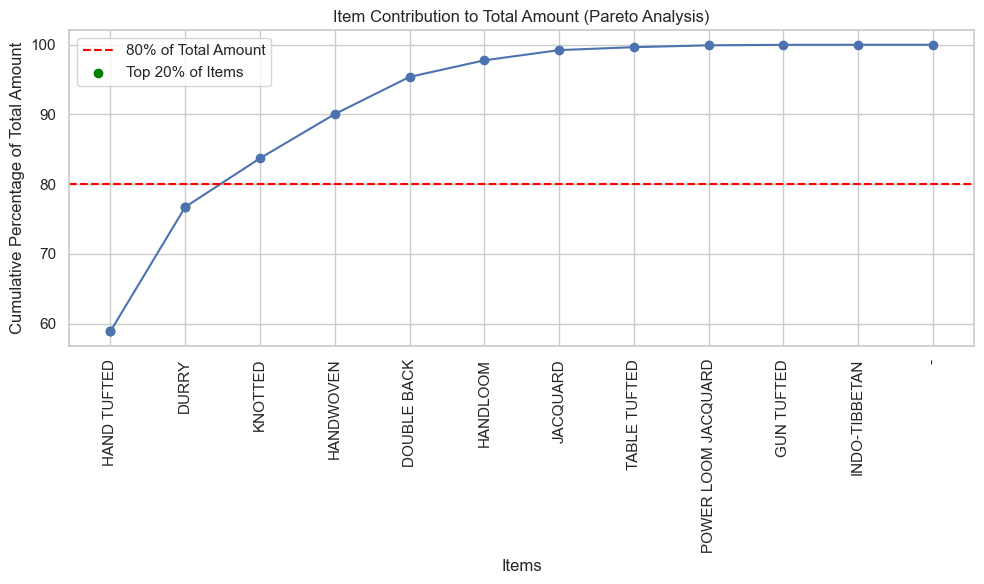

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

item_contribution = dataset_filtered.groupby('ITEM_NAME')['Amount'].sum().sort_values(ascending=False)
total_amount = item_contribution.sum()
item_contribution_cumulative = item_contribution.cumsum() / total_amount * 100
top_20_items = item_contribution_cumulative[item_contribution_cumulative <= 80]
plt.figure(figsize=(10, 6))
plt.plot(item_contribution_cumulative, marker='o', linestyle='-')
plt.axhline(y=80, color='red', linestyle='--', label='80% of Total Amount')
plt.scatter(top_20_items.index, top_20_items.values, color='green', label='Top 20% of Items')
plt.xlabel('Items')
plt.ylabel('Cumulative Percentage of Total Amount')
plt.title('Item Contribution to Total Amount (Pareto Analysis)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()


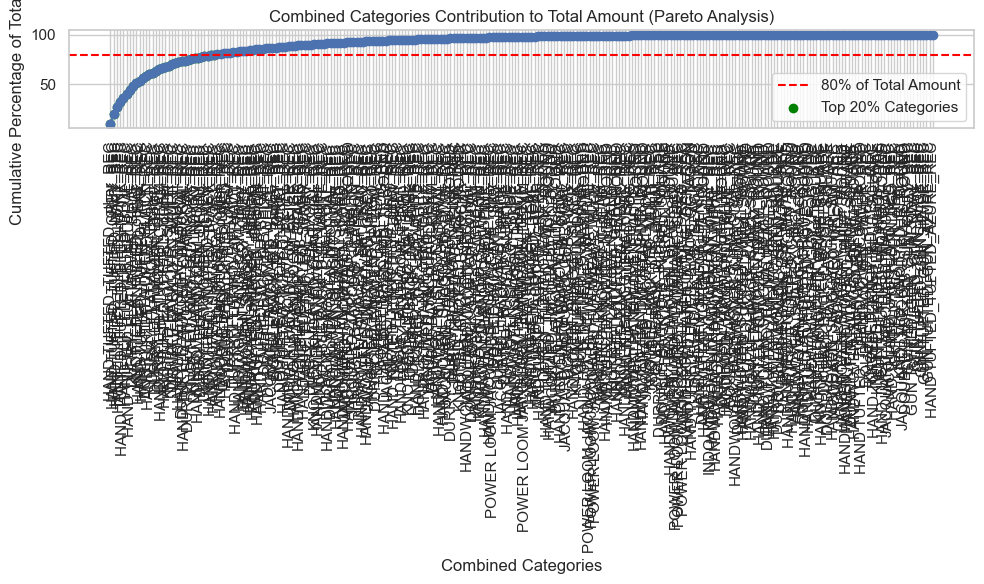

In [24]:
# Create a new column by combining multiple columns
dataset_filtered['Combined_Column'] = dataset_filtered['ITEM_NAME'] + '_' + dataset_filtered['Filteredquality'] + '_' + dataset_filtered['FilteredColor'] + '_' + dataset_filtered['ShapeName']

# Calculate total amount for each combined category
category_amount = dataset_filtered.groupby('Combined_Column')['Amount'].sum().sort_values(ascending=False)

# Calculate cumulative contribution for categories
total_amount = category_amount.sum()
category_contribution_cumulative = category_amount.cumsum() / total_amount * 100

# Identify the top 20% contributing categories
top_20_categories = category_contribution_cumulative[category_contribution_cumulative <= 80]

# Plotting Pareto chart for combined categories and amounts
plt.figure(figsize=(10, 6))
plt.plot(category_contribution_cumulative, marker='o', linestyle='-')
plt.axhline(y=80, color='red', linestyle='--', label='80% of Total Amount')

# Highlight the top 20% contributing categories
plt.scatter(top_20_categories.index, top_20_categories.values, color='green', label='Top 20% Categories')

plt.xlabel('Combined Categories')
plt.ylabel('Cumulative Percentage of Total Amount')
plt.title('Combined Categories Contribution to Total Amount (Pareto Analysis)')
plt.legend()
plt.xticks(rotation=90)
plt.tight_layout()

# Show plot
plt.show()


In [25]:
from collections import Counter

# Define a function to get the top N items from each category
def get_top_n_items(column, n=10):
    counter = Counter(column)
    top_items = [item for item, count in counter.most_common(n)]
    return top_items

# Get top 10 items for each categorical column
top_items_item_name = get_top_n_items(dataset_filtered['ITEM_NAME'])
top_items_filtered_quality = get_top_n_items(dataset_filtered['Filteredquality'])
top_items_filtered_color = get_top_n_items(dataset_filtered['FilteredColor'])
top_items_shape_name = get_top_n_items(dataset_filtered['ShapeName'])

# Create a new column by combining top 10 items from each categorical column
dataset_filtered['Combined_Top_Items'] = dataset_filtered['ITEM_NAME'].apply(lambda x: x if x in top_items_item_name else 'Other') + '_' + \
                                         dataset_filtered['Filteredquality'].apply(lambda x: x if x in top_items_filtered_quality else 'Other') + '_' + \
                                         dataset_filtered['FilteredColor'].apply(lambda x: x if x in top_items_filtered_color else 'Other') + '_' + \
                                         dataset_filtered['ShapeName'].apply(lambda x: x if x in top_items_shape_name else 'Other')

# Display the first few rows of the updated DataFrame with the new combined column
print(dataset_filtered[['Combined_Top_Items']])


                  Combined_Top_Items
0       HAND TUFTED_TUFTED_Other_REC
1       HAND TUFTED_TUFTED_BEIGE_REC
2       HAND TUFTED_TUFTED_BEIGE_REC
3       HAND TUFTED_TUFTED_Other_REC
4        HAND TUFTED_TUFTED_NAVY_REC
...                              ...
13130       DURRY_FLATWOVEN_BLUE_REC
13131       DURRY_FLATWOVEN_BLUE_REC
13132       DURRY_FLATWOVEN_BLUE_REC
13133       DURRY_FLATWOVEN_BLUE_REC
13134  HANDLOOM_HANDLOOM_outlier_REC

[13135 rows x 1 columns]


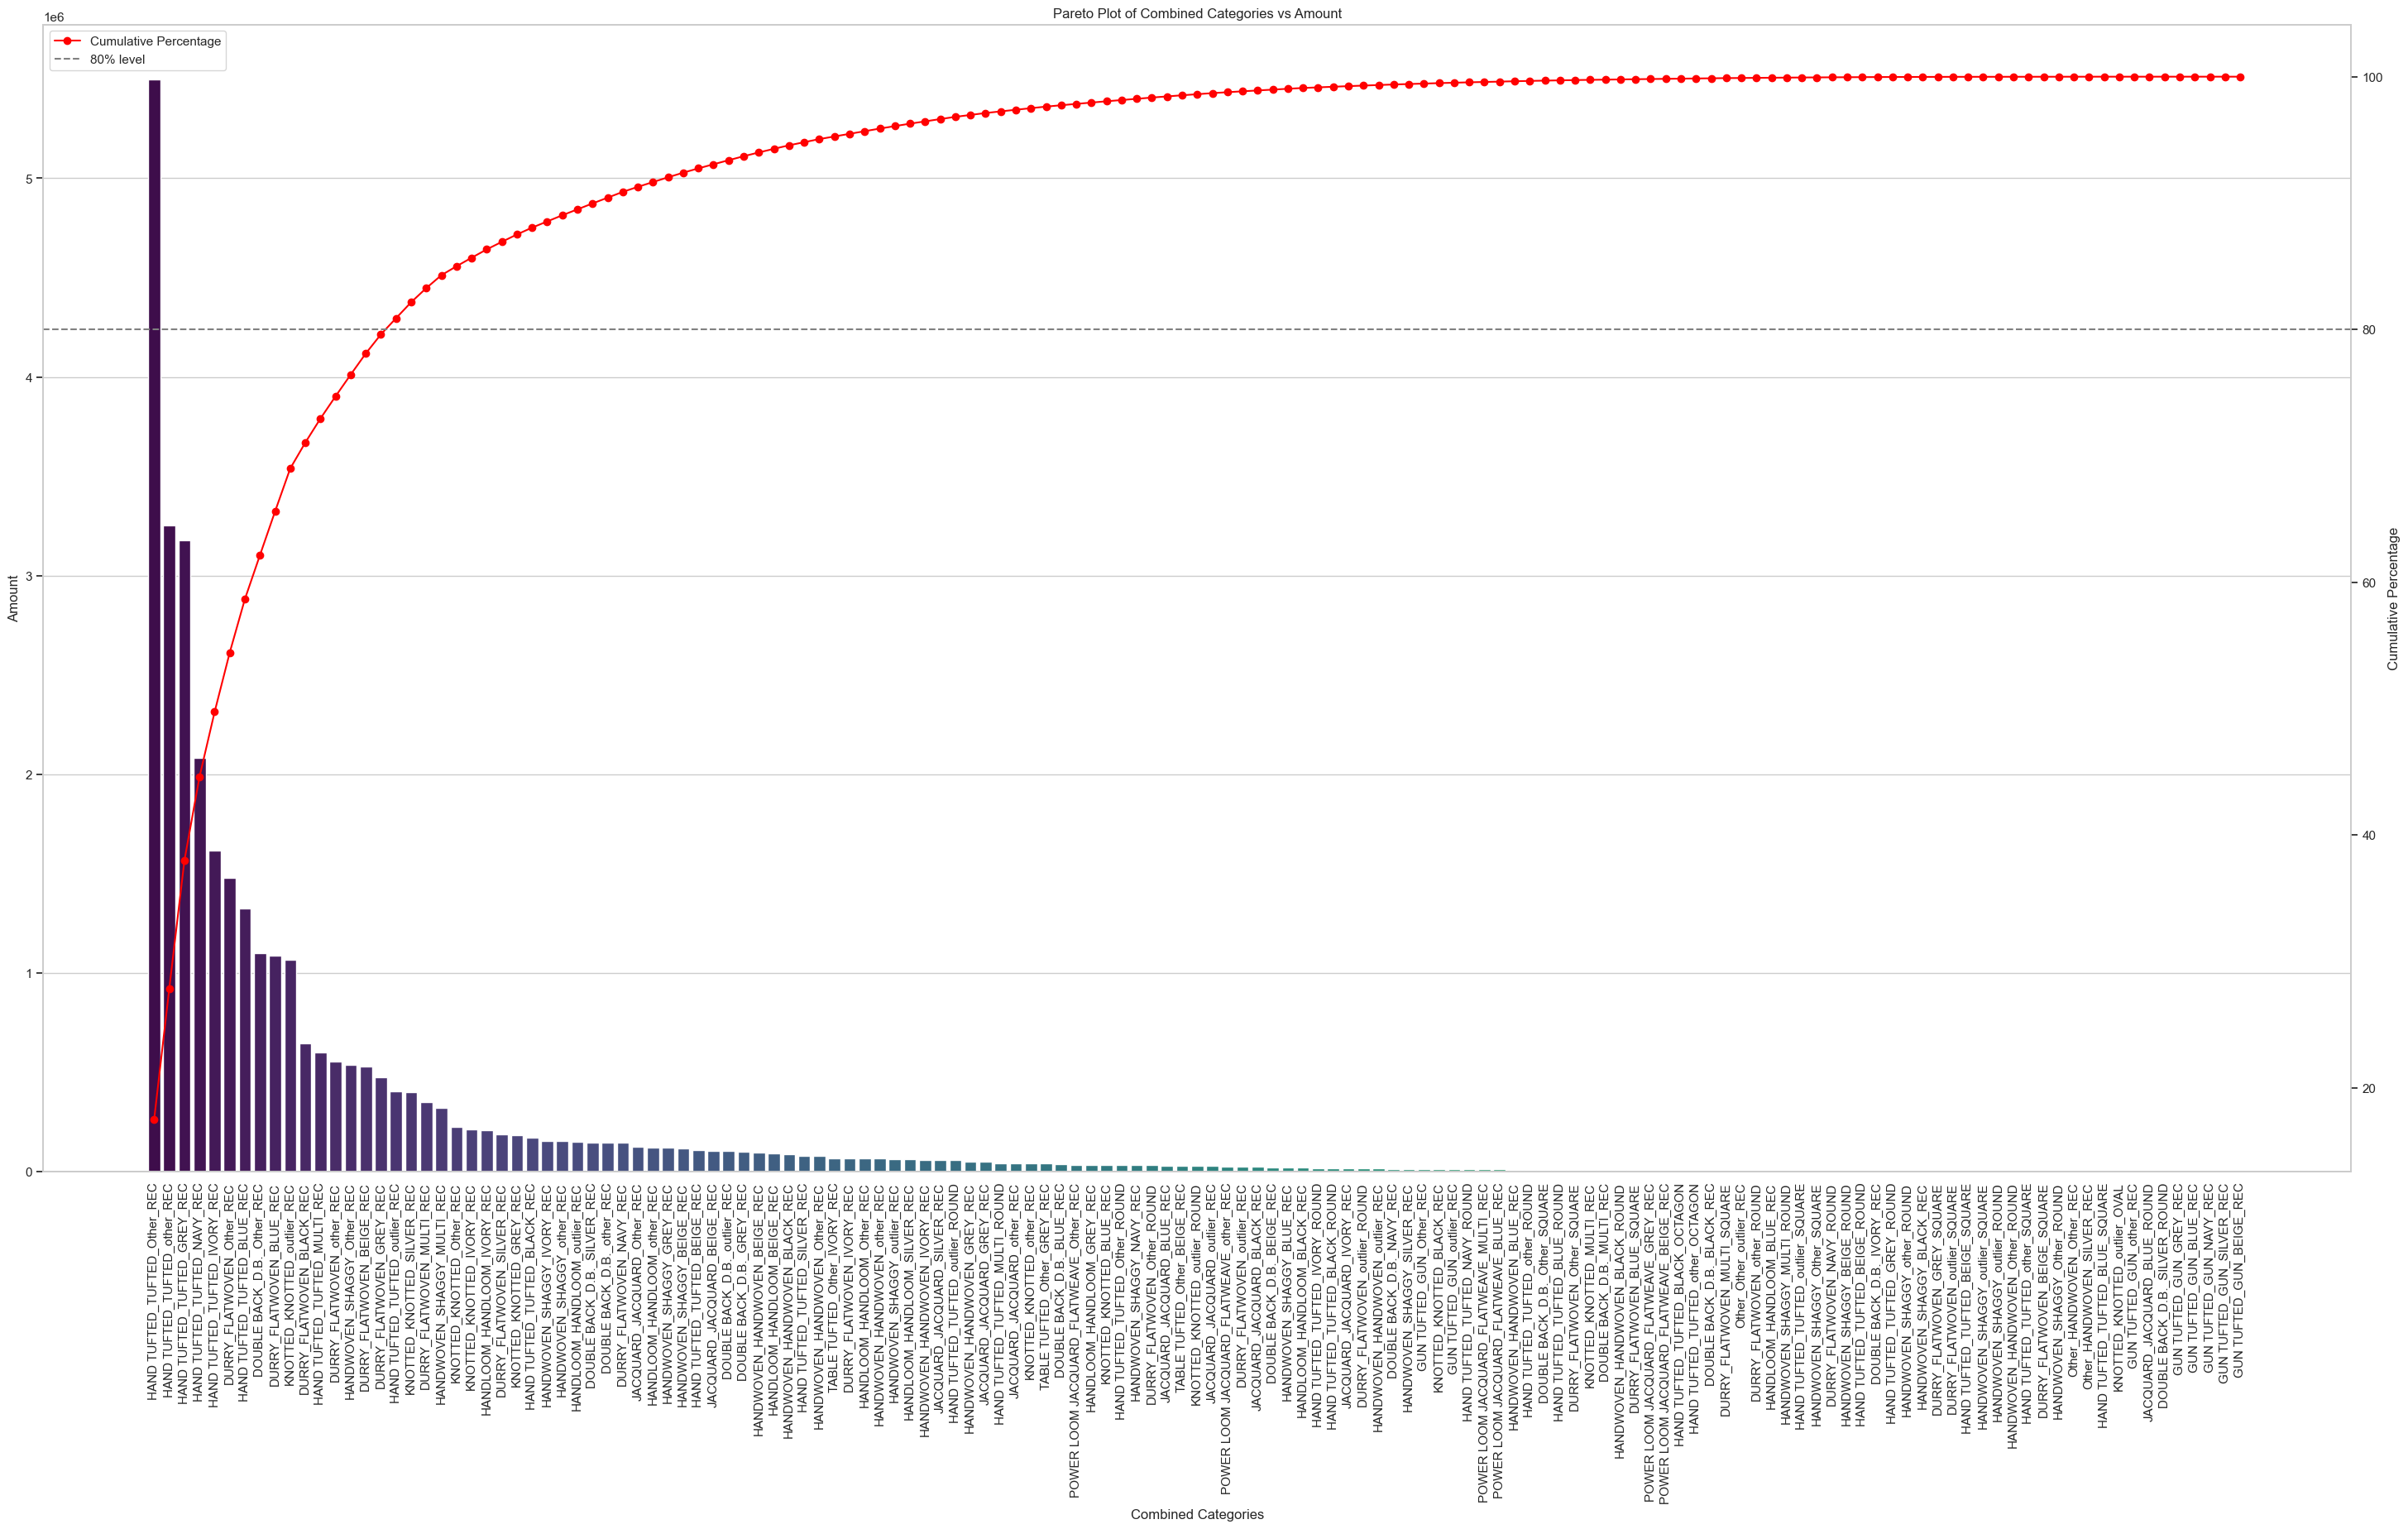

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the total amount for each category in the 'Combined_Top_Items' column
combined_amount = dataset_filtered.groupby('Combined_Top_Items')['Amount'].sum().sort_values(ascending=False)

# Calculate cumulative sum and percentage
cumulative_amount = combined_amount.cumsum()
total_amount = combined_amount.sum()
percentage = cumulative_amount / total_amount * 100

# Plotting the Pareto plot with Combined_Top_Items and 80% dashed line
plt.figure(figsize=(36, 18))
sns.barplot(x=combined_amount.index, y=combined_amount.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel('Combined Categories')
plt.ylabel('Amount')
plt.title('Pareto Plot of Combined Categories vs Amount')
plt.twinx()
plt.plot(percentage.values, marker='o', color='red', linestyle='-', label='Cumulative Percentage')
plt.axhline(y=80, color='gray', linestyle='--', label='80% level')  # Adding the dashed line at 80%
plt.ylabel('Cumulative Percentage')
plt.legend(loc='upper left')
plt.grid(visible=False)
plt.show()



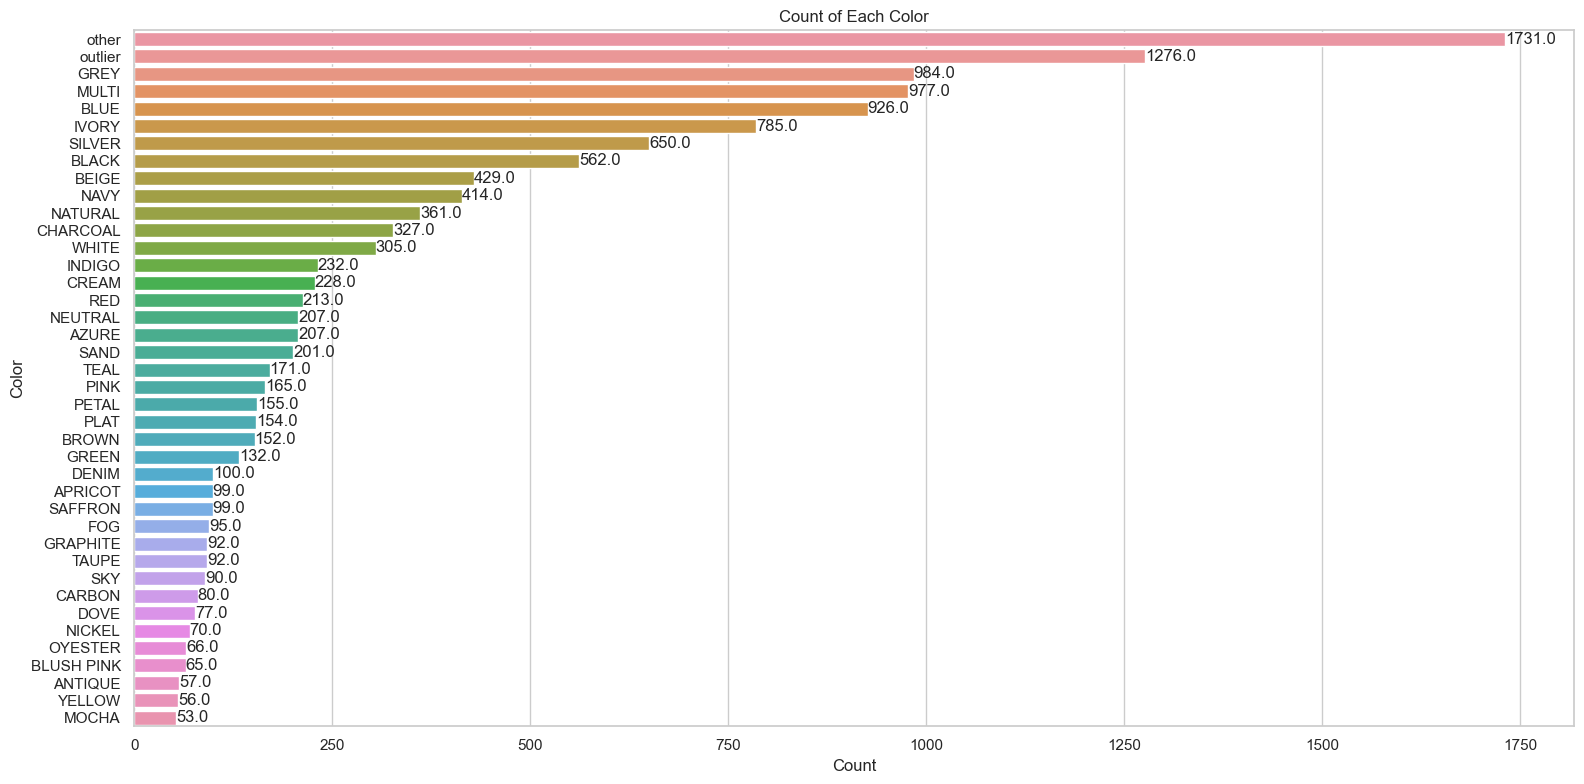

In [27]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=dataset_filtered, y='FilteredColor', order=dataset_filtered['FilteredColor'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Color')
plt.title('Count of Each Color')

# Annotate each bar with the count value
for p in ax.patches:
    count = p.get_width()  # Get the count value for each bar
    x = p.get_x() + p.get_width() + 0.02  # Position to place the annotation text
    y = p.get_y() + p.get_height() / 2  # Vertical alignment
    ax.annotate(f'{count}', (x, y), va='center')

plt.tight_layout()
plt.show()

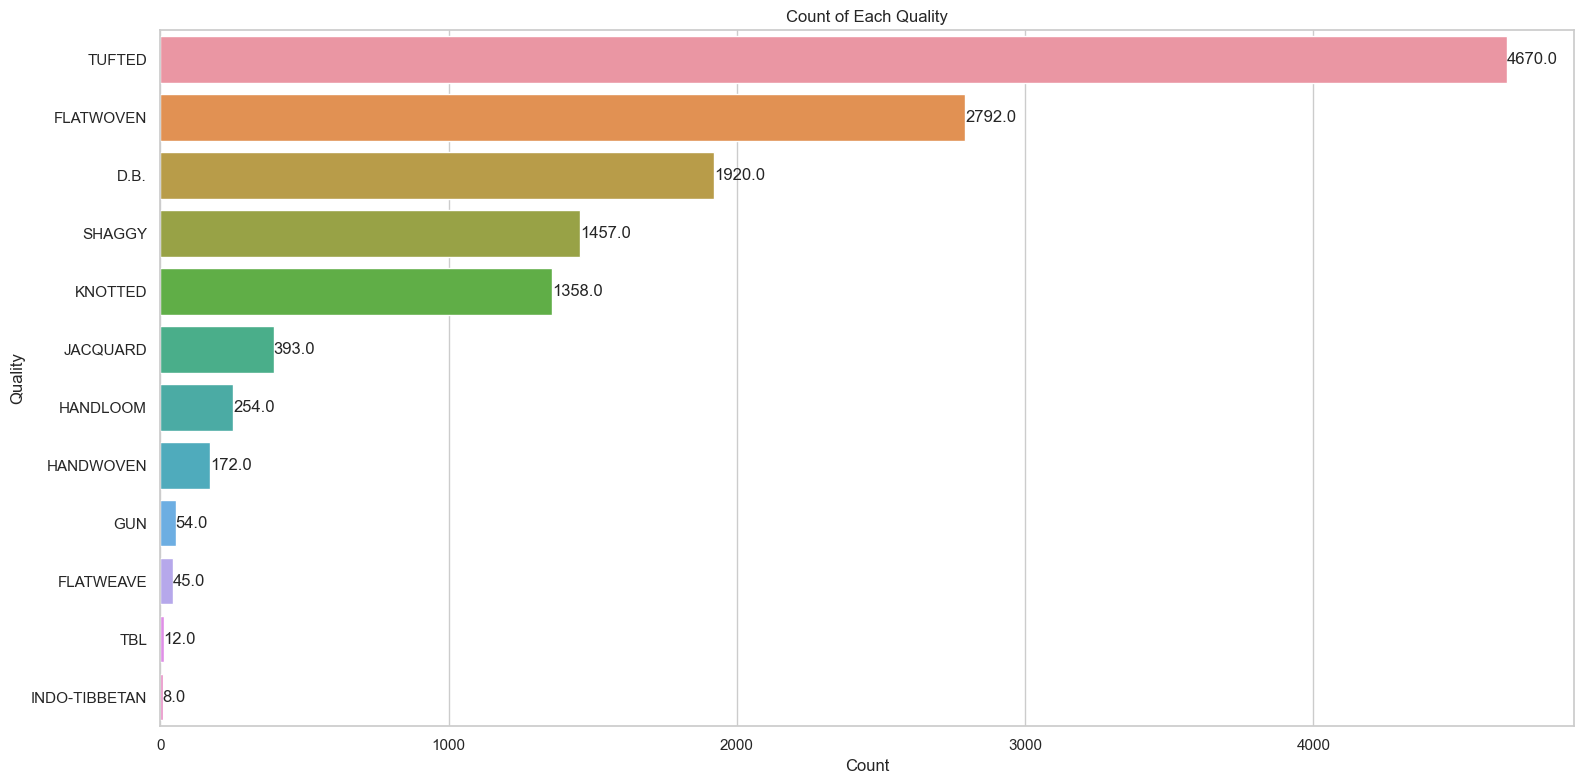

In [28]:
plt.figure(figsize=(16, 8))
ax = sns.countplot(data=dataset_filtered, y='Filteredquality', order=dataset_filtered['Filteredquality'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('Quality')
plt.title('Count of Each Quality')

# Annotate each bar with the count value
for p in ax.patches:
    count = p.get_width()  # Get the count value for each bar
    x = p.get_x() + p.get_width() + 0.02  # Position to place the annotation text
    y = p.get_y() + p.get_height() / 2  # Vertical alignment
    ax.annotate(f'{count}', (x, y), va='center')

plt.tight_layout()
plt.show()

top 10 color name-list

In [29]:
import pandas as pd

# Assuming dataset_filtered is your DataFrame and 'FilteredColor' is the column with the filtered colors
# Replace 'updated_dataset_with_filtered_colors.csv' with your actual file path
dataset_filtered = pd.read_csv('updated_dataset_with_filtered_colors.csv')

# Define a list of labels to filter out ('other' and potentially outliers)
labels_to_filter = ['other', 'outlier']  # Add other outlier labels as needed

# Filter out 'other' and potential outliers
filtered_data = dataset_filtered[~dataset_filtered['FilteredColor'].isin(labels_to_filter)]

# Count occurrences of each color
color_counts = filtered_data['FilteredColor'].value_counts()

# Extract top 10 colors
top_10_colors = color_counts.head(10)

# Display the top 10 colors in a table
top_10_colors_table = pd.DataFrame({'Color': top_10_colors.index, 'Count': top_10_colors.values})
print(top_10_colors_table)



      Color  Count
0      GREY    984
1     MULTI    977
2      BLUE    926
3     IVORY    785
4    SILVER    650
5     BLACK    562
6     BEIGE    429
7      NAVY    414
8   NATURAL    361
9  CHARCOAL    327


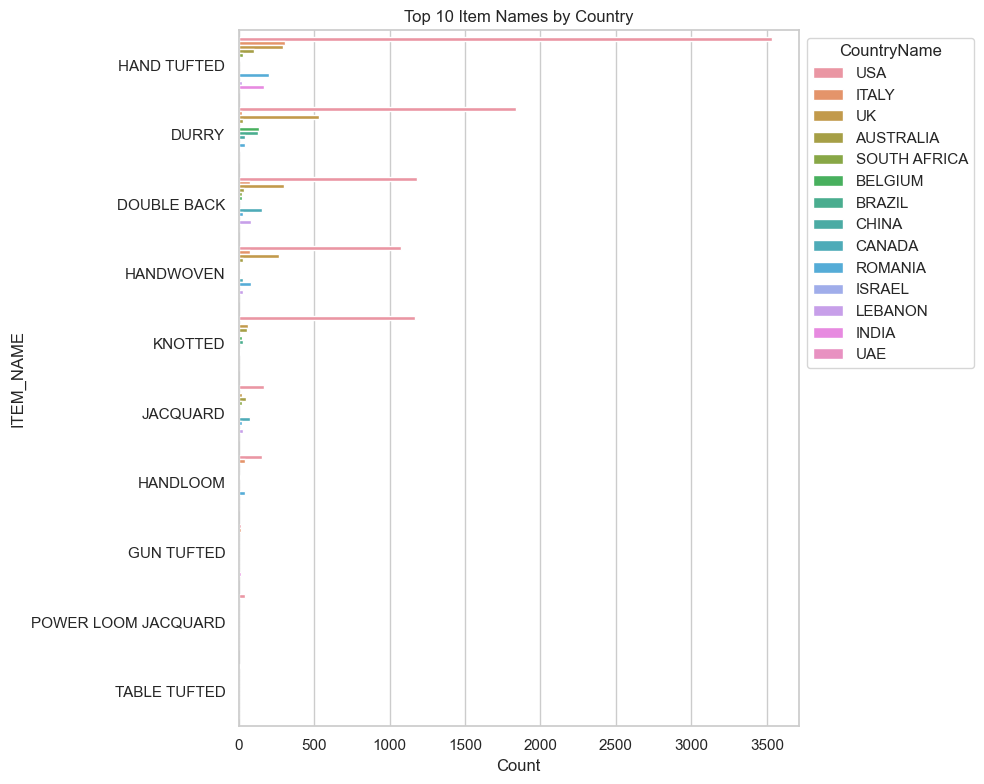

In [30]:
top_10_items = dataset_filtered['ITEM_NAME'].value_counts().head(10).index

# Filter dataset to include only the top 10 item names
top_10_data = dataset_filtered[dataset_filtered['ITEM_NAME'].isin(top_10_items)]

# Plotting
plt.figure(figsize=(10, 8))
sns.countplot(data=top_10_data, y='ITEM_NAME', hue='CountryName', order=top_10_data['ITEM_NAME'].value_counts().index)
plt.xlabel('Count')
plt.ylabel('ITEM_NAME')
plt.title('Top 10 Item Names by Country')
plt.legend(title='CountryName', bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()

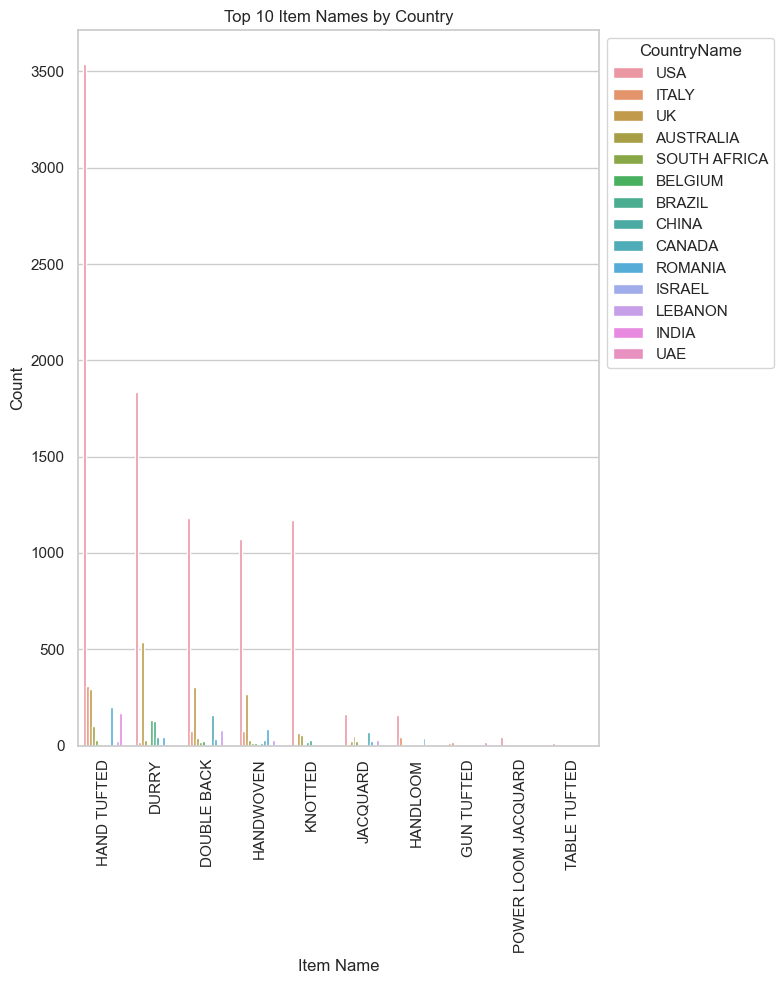

In [31]:


# Get the top 10 item names based on their count
top_10_items = dataset_filtered['ITEM_NAME'].value_counts().head(10).index

# Filter dataset to include only the top 10 item names
top_10_data = dataset_filtered[dataset_filtered['ITEM_NAME'].isin(top_10_items)]

# Plotting
plt.figure(figsize=(8, 10))
sns.countplot(data=top_10_data, x='ITEM_NAME', hue='CountryName', order=top_10_items)
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Top 10 Item Names by Country')
plt.legend(title='CountryName', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=90)  # Rotates x-labels for better readability
plt.tight_layout()

# Show plot
plt.show()


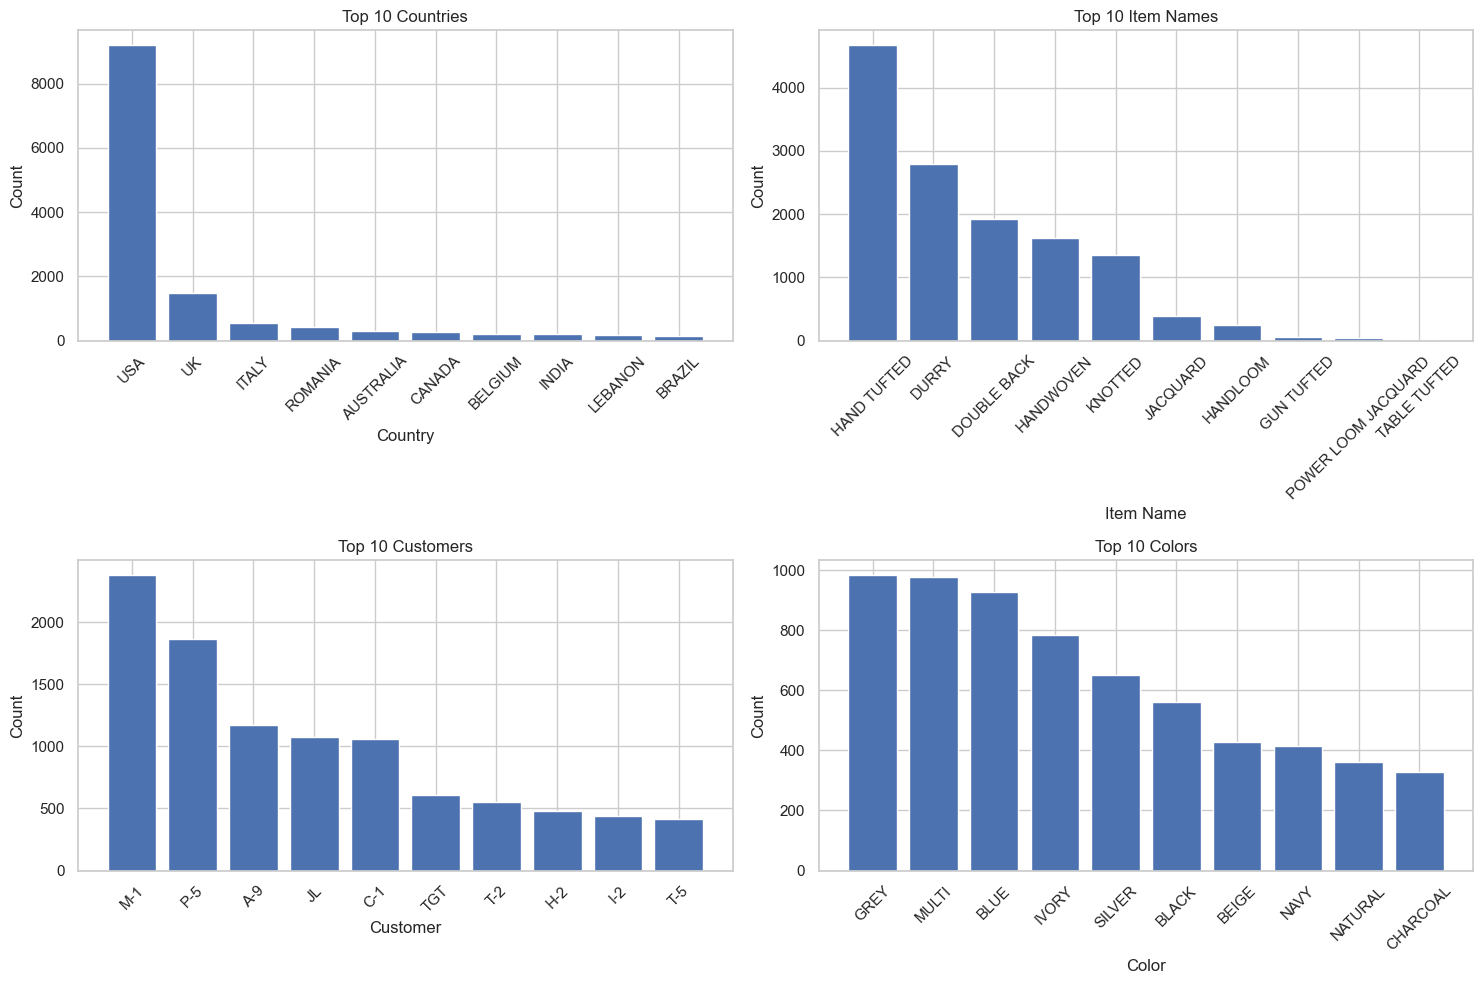

In [32]:
import matplotlib.pyplot as plt

# Get top 10 countries, item names, customers, and colors
top_10_countries = dataset_filtered['CountryName'].value_counts().head(10)
top_10_items = dataset_filtered['ITEM_NAME'].value_counts().head(10)
top_10_customers = dataset_filtered['CustomerCode'].value_counts().head(10)
top_10_colors = dataset_filtered[~dataset_filtered['FilteredColor'].isin(['other', 'outlier'])]['FilteredColor'].value_counts().head(10)

# Create subplots for each visualization
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Plot top 10 countries
axs[0, 0].bar(top_10_countries.index, top_10_countries.values)
axs[0, 0].set_title('Top 10 Countries')
axs[0, 0].set_xlabel('Country')
axs[0, 0].set_ylabel('Count')
axs[0, 0].tick_params(axis='x', rotation=45)

# Plot top 10 item names
axs[0, 1].bar(top_10_items.index, top_10_items.values)
axs[0, 1].set_title('Top 10 Item Names')
axs[0, 1].set_xlabel('Item Name')
axs[0, 1].set_ylabel('Count')
axs[0, 1].tick_params(axis='x', rotation=45)

# Plot top 10 customers
axs[1, 0].bar(top_10_customers.index, top_10_customers.values)
axs[1, 0].set_title('Top 10 Customers')
axs[1, 0].set_xlabel('Customer')
axs[1, 0].set_ylabel('Count')
axs[1, 0].tick_params(axis='x', rotation=45)

# Plot top 10 colors
axs[1, 1].bar(top_10_colors.index, top_10_colors.values)
axs[1, 1].set_title('Top 10 Colors')
axs[1, 1].set_xlabel('Color')
axs[1, 1].set_ylabel('Count')
axs[1, 1].tick_params(axis='x', rotation=45)

# Adjust layout
plt.tight_layout()

# Show plots
plt.show()


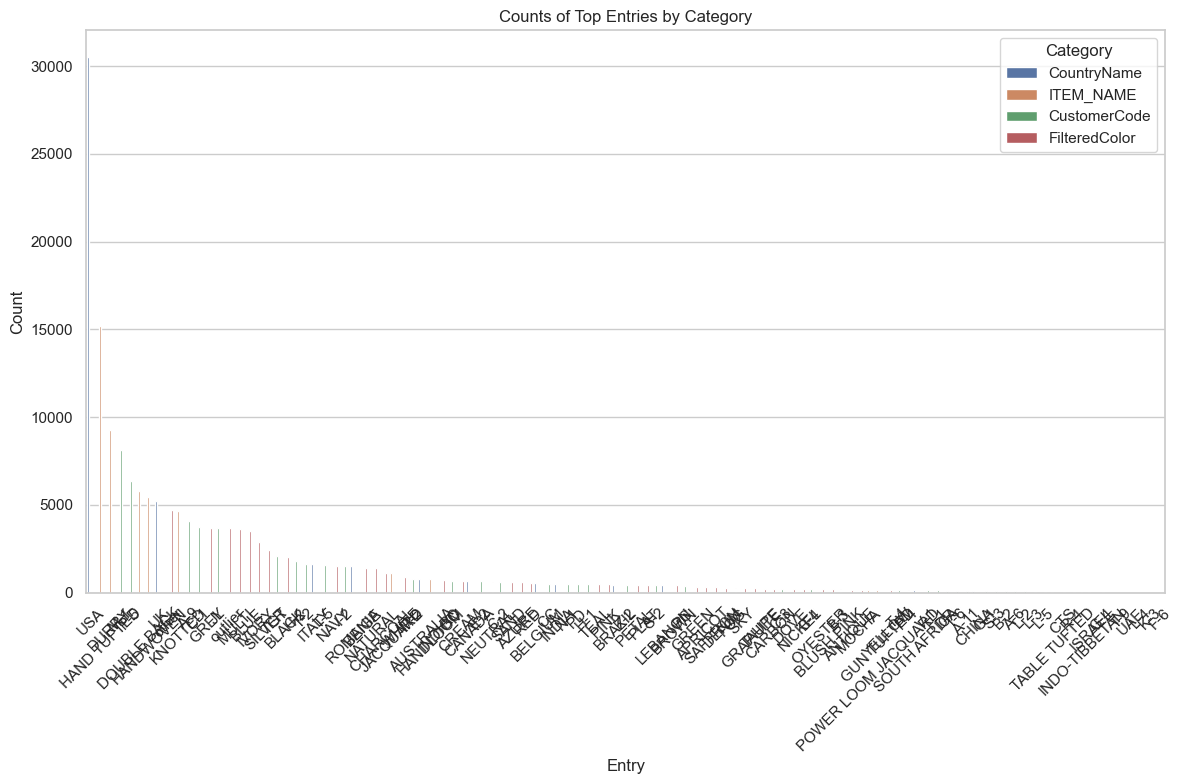

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataset_filtered is your DataFrame with columns: 'CountryName', 'ITEM_NAME', 'CustomerCode', 'FilteredColor'
# Replace 'dataset_filtered.csv' with your actual file path or use your existing DataFrame
# Replace 'CountryName', 'ITEM_NAME', 'CustomerCode', 'FilteredColor' with your actual column names

# Extracting top 10 entries for each category
top_10_countries = dataset_filtered['CountryName'].value_counts().head(10).index.tolist()
top_10_items = dataset_filtered['ITEM_NAME'].value_counts().head(10).index.tolist()
top_10_customers = dataset_filtered['CustomerCode'].value_counts().head(10).index.tolist()
top_10_colors = dataset_filtered[~dataset_filtered['FilteredColor'].isin(['other', 'outlier'])]['FilteredColor'].value_counts().head(10).index.tolist()

# Filter the DataFrame to include only top entries from different columns
filtered_countries = dataset_filtered[dataset_filtered['CountryName'].isin(top_10_countries)]
filtered_items = dataset_filtered[dataset_filtered['ITEM_NAME'].isin(top_10_items)]
filtered_customers = dataset_filtered[dataset_filtered['CustomerCode'].isin(top_10_customers)]
filtered_colors = dataset_filtered[dataset_filtered['FilteredColor'].isin(top_10_colors)]

# Concatenate the filtered DataFrames
combined_data = pd.concat([filtered_countries, filtered_items, filtered_customers, filtered_colors])

# Reshape the data using melt to prepare for visualization
melted_data = combined_data.melt(value_vars=['CountryName', 'ITEM_NAME', 'CustomerCode', 'FilteredColor'], var_name='Category', value_name='Entry')

# Plotting
plt.figure(figsize=(12, 8))
sns.countplot(data=melted_data, x='Entry', hue='Category', order=melted_data['Entry'].value_counts().index)
plt.xlabel('Entry')
plt.ylabel('Count')
plt.title('Counts of Top Entries by Category')
plt.legend(title='Category')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


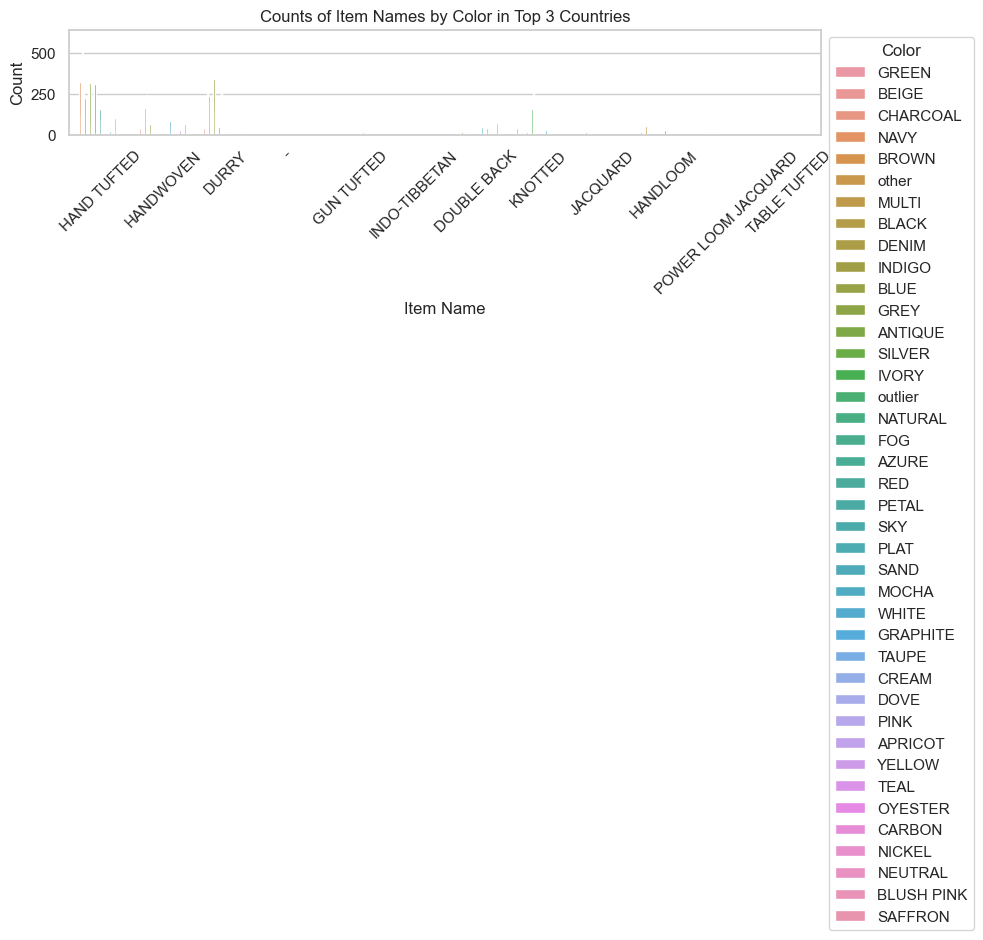

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataset_filtered is your DataFrame with columns: 'CountryName', 'ITEM_NAME', 'FilteredColor'
# Replace 'dataset_filtered.csv' with your actual file path or use your existing DataFrame
# Replace 'CountryName', 'ITEM_NAME', 'FilteredColor' with your actual column names

# Get the top 3 countries
top_3_countries = dataset_filtered['CountryName'].value_counts().head(3).index.tolist()

# Filter the dataset to include only the top 3 countries
filtered_data = dataset_filtered[dataset_filtered['CountryName'].isin(top_3_countries)]

# Plotting
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_data, x='ITEM_NAME', hue='FilteredColor')
plt.xlabel('Item Name')
plt.ylabel('Count')
plt.title('Counts of Item Names by Color in Top 3 Countries')
plt.legend(title='Color', bbox_to_anchor=(1, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


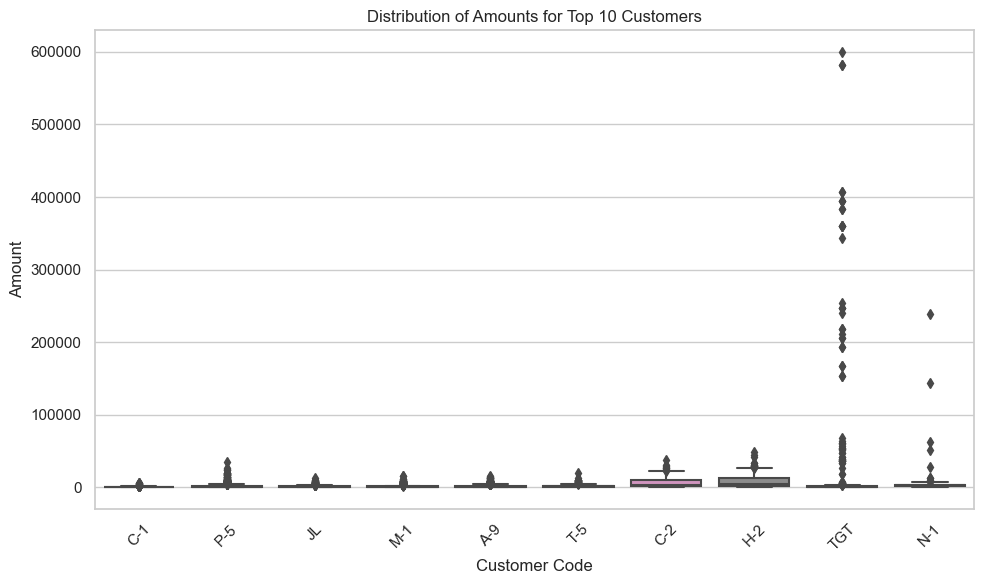

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming dataset_filtered is your DataFrame with columns: 'CustomerCode', 'Amount'
# Replace 'dataset_filtered.csv' with your actual file path or use your existing DataFrame
# Replace 'CustomerCode', 'Amount' with your actual column names

# Get the top 10 customers based on the amount they've contributed
top_10_customers = dataset_filtered.groupby('CustomerCode')['Amount'].sum().nlargest(10).index.tolist()

# Filter the dataset to include only the top 10 customers
filtered_data = dataset_filtered[dataset_filtered['CustomerCode'].isin(top_10_customers)]

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(data=filtered_data, x='CustomerCode', y='Amount')
plt.xlabel('Customer Code')
plt.ylabel('Amount')
plt.title('Distribution of Amounts for Top 10 Customers')
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()


important costumer of each country

In [36]:
# Assuming dataset_filtered is your DataFrame with columns: 'CustomerCode', 'CountryName', 'Amount'
# Replace 'dataset_filtered.csv' with your actual file path or use your existing DataFrame
# Replace 'CustomerCode', 'CountryName', 'Amount' with your actual column names

# Grouping by 'CountryName' and 'CustomerCode', calculating the sum of 'Amount' for each customer in each country
grouped_data = dataset_filtered.groupby(['CountryName', 'CustomerCode'])['Amount'].sum().reset_index()

# Finding the customer in each country who has contributed the most amount
idx = grouped_data.groupby(['CountryName'])['Amount'].transform(max) == grouped_data['Amount']
customer_most_amount_per_country = grouped_data[idx]

# Displaying the result
print(customer_most_amount_per_country)


     CountryName CustomerCode        Amount
1      AUSTRALIA           RC  3.282907e+05
3        BELGIUM           PD  4.045289e+05
5         BRAZIL          K-2  5.987727e+04
6         CANADA          E-2  1.167783e+05
7          CHINA          B-2  1.481116e+04
9          INDIA           CC  1.475740e+05
10        ISRAEL          F-6  1.680000e+04
12         ITALY          T-2  5.630988e+05
13       LEBANON          S-2  5.674273e+04
14       ROMANIA          I-2  4.266260e+05
16  SOUTH AFRICA          L-3  9.075675e+04
17           UAE          L-4  4.423400e+04
18            UK           JL  1.231578e+06
43           USA          TGT  1.134105e+07


# preprocessing

In [37]:
dataset_filtered.nunique()

CustomerCode       45
CountryName        14
Amount           3363
ITEM_NAME          12
QualityName       184
ColorName         464
ShapeName           5
AreaFt            288
FirstWord         174
FilteredColor      40
dtype: int64

finding missing value

finding missing value in numeric features

In [38]:
#This provides the descriptive statistical details of the data
dataset_filtered.describe()

,Amount,AreaFt
count,13135.000000,13135.000000
mean,2392.040164,54.622369
std,16832.091080,49.072767
min,0.000000,0.444400
25%,163.200000,15.000000
50%,590.625000,40.000000
75%,1540.000000,80.000000
max,599719.680000,645.722200


In [39]:
import numpy as np
# Replace 0 values in 'Amount' and 'AreaFt' columns with NaN
dataset_filtered['Amount'].replace(0, np.nan, inplace=True)
dataset_filtered['AreaFt'].replace(0, np.nan, inplace=True)

treatment by using median Imputation

In [40]:
# Impute missing values with the median for 'Amount' and 'AreaFt'
median_amount = dataset_filtered['Amount'].median()
median_area = dataset_filtered['AreaFt'].median()

dataset_filtered['Amount'].fillna(median_amount, inplace=True)
dataset_filtered['AreaFt'].fillna(median_area, inplace=True)


In [41]:
#This provides the descriptive statistical details of the data
dataset_filtered.describe()

,Amount,AreaFt
count,13135.000000,13135.000000
mean,2418.695855,54.622369
std,16828.789057,49.072767
min,0.100000,0.444400
25%,221.400000,15.000000
50%,641.250000,40.000000
75%,1540.000000,80.000000
max,599719.680000,645.722200


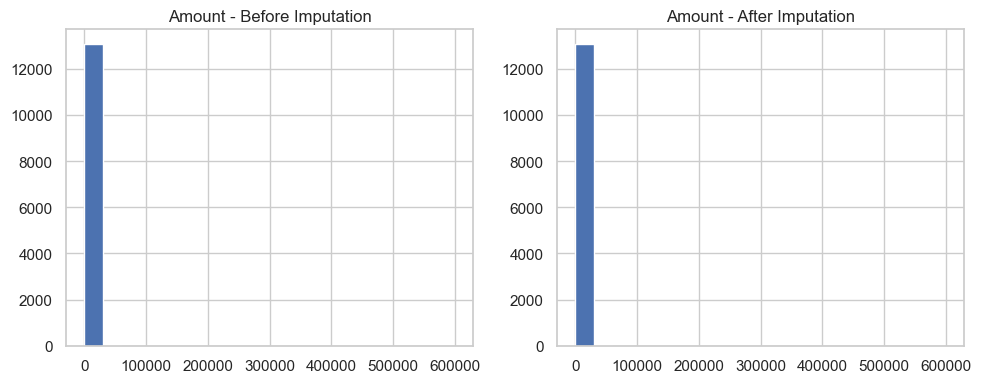

In [42]:
import matplotlib.pyplot as plt

# Plot histograms before and after imputation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(dataset_filtered['Amount'], bins=20)
plt.title('Amount - Before Imputation')

# Apply median imputation
# (code for median imputation goes here)

plt.subplot(1, 2, 2)
plt.hist(dataset_filtered['Amount'], bins=20)
plt.title('Amount - After Imputation')

plt.tight_layout()
plt.show()


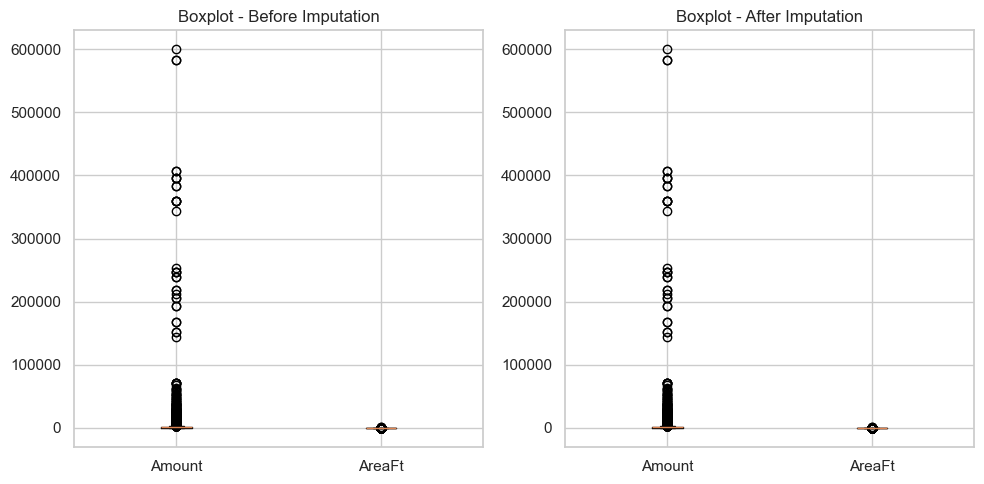

In [43]:
import matplotlib.pyplot as plt

# Boxplot before imputation
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.boxplot(dataset_filtered[['Amount', 'AreaFt']].dropna().values)
plt.xticks([1, 2], ['Amount', 'AreaFt'])
plt.title('Boxplot - Before Imputation')

# Apply median imputation
# (code for median imputation goes here)

# Boxplot after imputation
plt.subplot(1, 2, 2)
plt.boxplot(dataset_filtered[['Amount', 'AreaFt']].values)
plt.xticks([1, 2], ['Amount', 'AreaFt'])
plt.title('Boxplot - After Imputation')

plt.tight_layout()
plt.show()


finding and treating categorical features missed value

In [44]:
import numpy as np

# Replace '-' with NaN in 'ITEM_NAME' column
dataset_filtered['ITEM_NAME'].replace('-', np.nan, inplace=True)

# Remove rows with missing values in 'ITEM_NAME' column
dataset_filtered.dropna(subset=['ITEM_NAME'], inplace=True)


decrease influence of outlier in numeric data 

In [79]:
import numpy as np

# Make a copy of the dataset_filtered
dataset_filtered_transformed = dataset_filtered.copy()

# Log transformation for 'Amount' and 'AreaFt'
dataset_filtered_transformed['Amount_log'] = np.log(dataset_filtered_transformed['Amount'])
dataset_filtered_transformed['AreaFt_log'] = np.log(dataset_filtered_transformed['AreaFt'])


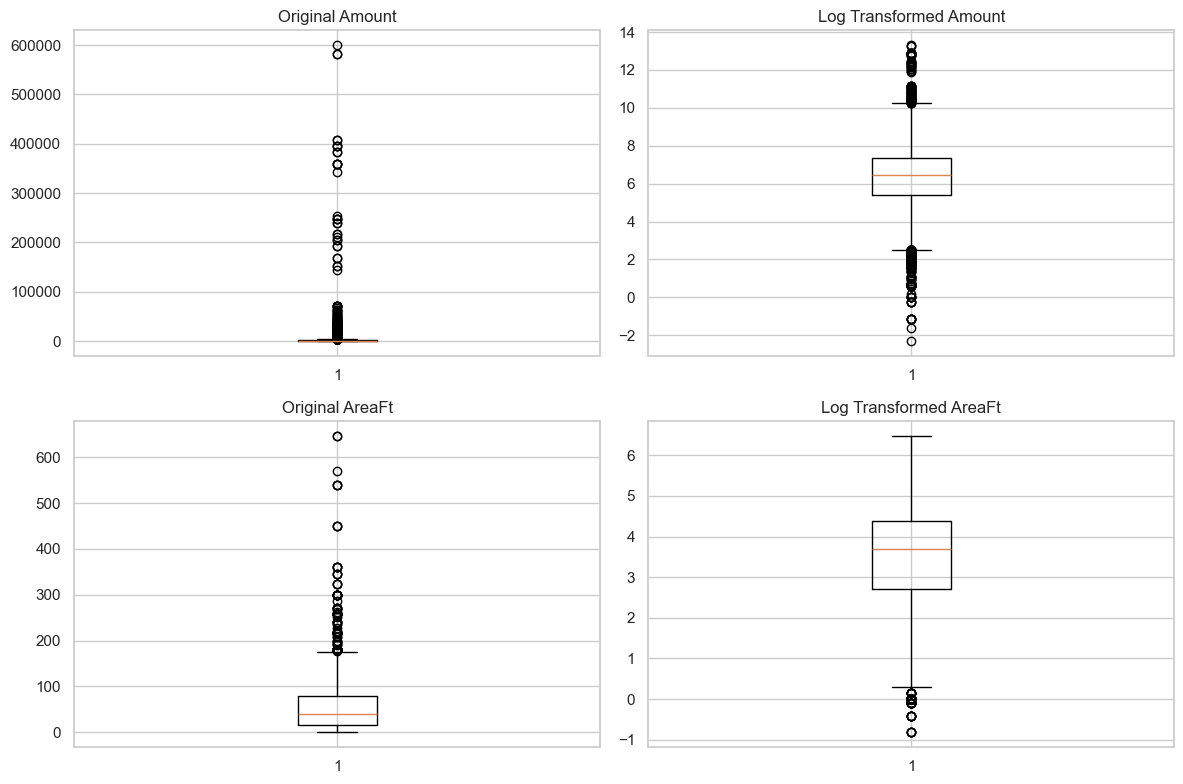

In [80]:
import matplotlib.pyplot as plt

# Create subplots for box plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Boxplot for 'Amount'
axes[0, 0].boxplot(dataset_filtered['Amount'].dropna())
axes[0, 0].set_title('Original Amount')

# Boxplot for 'Amount_log'
axes[0, 1].boxplot(dataset_filtered_transformed['Amount_log'].dropna())
axes[0, 1].set_title('Log Transformed Amount')

# Boxplot for 'AreaFt'
axes[1, 0].boxplot(dataset_filtered['AreaFt'].dropna())
axes[1, 0].set_title('Original AreaFt')

# Boxplot for 'AreaFt_log'
axes[1, 1].boxplot(dataset_filtered_transformed['AreaFt_log'].dropna())
axes[1, 1].set_title('Log Transformed AreaFt')

# Adjust layout and display plots
plt.tight_layout()
plt.show()



# amount scaling

In [107]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Scale the log-transformed features
dataset_filtered_transformed[['Amount_log', 'AreaFt_log']] = scaler.fit_transform(
    dataset_filtered_transformed[['Amount_log', 'AreaFt_log']]
)
# Displaying the head of the DataFrame with the scaled 'Amount' values
dataset_filtered_transformed.head()

,CustomerCode,CountryName,Amount,ITEM_NAME,QualityName,ColorName,ShapeName,AreaFt,FirstWord,FilteredColor,FirstWordQuality,Filteredcolor,FilteredQuality,Amount_log,AreaFt_log
0,H-1,USA,769.5,HAND TUFTED,TUFTED 30C HARD TWIST,GREEN/IVORY,REC,128.25,GREEN,<bound method NDFrame.copy of 0 TUFT...,TUFTED,GREEN,TUFTED,0.573361,0.778011
1,H-1,USA,702.0,HAND TUFTED,TUFTED 60C,BEIGE,REC,117.00,BEIGE,<bound method NDFrame.copy of 0 TUFT...,TUFTED,BEIGE,TUFTED,0.567478,0.765403
2,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,BEIGE/SAGE,REC,88.00,BEIGE,<bound method NDFrame.copy of 0 TUFT...,TUFTED,BEIGE,TUFTED,0.559104,0.726284
3,H-1,USA,616.0,HAND TUFTED,TUFTED 60C,CHARCOAL,REC,88.00,CHARCOAL,<bound method NDFrame.copy of 0 TUFT...,TUFTED,CHARCOAL,TUFTED,0.559104,0.726284
4,H-1,USA,585.0,HAND TUFTED,TUFTED 60C,NAVY/BEIGE,REC,117.00,NAVY,<bound method NDFrame.copy of 0 TUFT...,TUFTED,NAVY,TUFTED,0.555796,0.765403


# One-Hot Encoding (except color name)

In [142]:
# One-hot encoding categorical columns
dataset_encoded = pd.get_dummies(dataset_filtered_transformed, columns=['CustomerCode', 'CountryName', 'ITEM_NAME', 'ShapeName', 'Filteredcolor', 'FilteredQuality'], drop_first=True)


In [143]:
dataset_encoded

,Amount,QualityName,ColorName,AreaFt,FirstWord,FilteredColor,FirstWordQuality,Amount_log,AreaFt_log,CustomerCode_A-6,...,FilteredQuality_FLATWOVEN,FilteredQuality_GUN,FilteredQuality_HANDLOOM,FilteredQuality_HANDWOVEN,FilteredQuality_INDO-TIBBETAN,FilteredQuality_JACQUARD,FilteredQuality_KNOTTED,FilteredQuality_SHAGGY,FilteredQuality_TBL,FilteredQuality_TUFTED
0,769.5,TUFTED 30C HARD TWIST,GREEN/IVORY,128.2500,GREEN,<bound method NDFrame.copy of 0 TUFT...,TUFTED,0.573361,0.778011,0,...,0,0,0,0,0,0,0,0,0,1
1,702.0,TUFTED 60C,BEIGE,117.0000,BEIGE,<bound method NDFrame.copy of 0 TUFT...,TUFTED,0.567478,0.765403,0,...,0,0,0,0,0,0,0,0,0,1
2,616.0,TUFTED 60C,BEIGE/SAGE,88.0000,BEIGE,<bound method NDFrame.copy of 0 TUFT...,TUFTED,0.559104,0.726284,0,...,0,0,0,0,0,0,0,0,0,1
3,616.0,TUFTED 60C,CHARCOAL,88.0000,CHARCOAL,<bound method NDFrame.copy of 0 TUFT...,TUFTED,0.559104,0.726284,0,...,0,0,0,0,0,0,0,0,0,1
4,585.0,TUFTED 60C,NAVY/BEIGE,117.0000,NAVY,<bound method NDFrame.copy of 0 TUFT...,TUFTED,0.555796,0.765403,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13130,51.0,FLATWOVEN PET 60C 2PLY,BLUE,80.0000,BLUE,<bound method NDFrame.copy of 0 TUFT...,FLATWOVEN,0.399468,0.713195,0,...,1,0,0,0,0,0,0,0,0,0
13131,41.0,FLATWOVEN PET 60C 2PLY,BLUE,40.0000,BLUE,<bound method NDFrame.copy of 0 TUFT...,FLATWOVEN,0.385483,0.618001,0,...,1,0,0,0,0,0,0,0,0,0
13132,23.0,FLATWOVEN PET 60C 2PLY,BLUE,108.0000,BLUE,<bound method NDFrame.copy of 0 TUFT...,FLATWOVEN,0.348443,0.754410,0,...,1,0,0,0,0,0,0,0,0,0
13133,22.0,FLATWOVEN PET 60C 2PLY,BLUE,140.0000,BLUE,<bound method NDFrame.copy of 0 TUFT...,FLATWOVEN,0.345595,0.790050,0,...,1,0,0,0,0,0,0,0,0,0
